### EDA IOWA Dataset - Exploratory Data Analysis (1)

**Status:** PUBLIC Distribution <br>

**Author:** Jaume Manero IE<br>
**Date created:** 2021/02/1<br>
**Last modified:** 2024/03/20<br>
**Description:** Analysis of IOWA Dataset

This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012 til 2023
The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

The installation of Geopandas and Plotly for the cholorpeth image is quite obscure and has dependencies with versions and operating system. Try to follow the error explanations to install all dependent packages.

In [1]:
# Liquor Sales : 
#    file: https://mydata.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy
# US County Boundaries & FIP Codes
#    file: https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_20m.zip
# Counties Population
#    file: https://data.iowa.gov/Community-Demographics/County-Population-in-Iowa-by-Year/qtnr-zsrc
# Cities in IOWA population
#    file: https://data.iowa.gov/Community-Demographics/Total-City-Population-by-Year/acem-thbp

In [2]:
import pandas as pd
from thefuzz import fuzz
import folium
import warnings
import geopandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
file = 'Iowa_Liquor_Sales_DEC2023.csv'
df = pd.read_csv(file, header=0)

In [4]:
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [5]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [6]:
df[['dummy','Lat', 'Lon']]= df['Store Location'].str.split(" ", n=-1, expand=True)

In [7]:
df['Lat'] = df['Lat'].str.replace('(', '')
df['Lon'] = df['Lon'].str.replace(')', '')

In [8]:
a = df['Store Location'].unique()
print( 'There are', len(a), 'stores')

There are 9464 stores


In [9]:
# to make the problem easier for the laptops we perform the exploration in 2015
df['Date'] = pd.to_datetime(df['Date'])
df_2015 = df[df['Date'].dt.year == 2015]
#df = df[df['Date'].dt.year == 2022]


In [10]:
# do we have invoices with multiple lines?
#pd.concat(g for _, g in df.groupby("Invoice/Item Number") if len(g) > 1)
#df[df.duplicated(["Invoice/Item Number"], keep=False)]

In [11]:
# Split invoice and item in two columns
df["invoice_number"] = df["Invoice/Item Number"].str[1:9]
df["item_number"]    = df["Invoice/Item Number"].str[9:12]

In [12]:
df["invoice_number"]

0           03394400
1           03381400
2           03384600
3           03391400
4           03410300
              ...   
27934716    NV-64773
27934717    NV-64770
27934718    NV-64780
27934719    NV-64780
27934720    NV-64777
Name: invoice_number, Length: 27934721, dtype: object

In [13]:
df.sort_values(["invoice_number", "item_number"], ascending=[True, True], inplace=True)

In [14]:
df_2015.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'dummy', 'Lat', 'Lon'],
      dtype='object')

##### =============================================================================================================
### Best-selling Category (by liters)
##### =============================================================================================================

In [15]:
df["Category Name"] = df["Category Name"].str.upper()
df_rank = df.groupby(['Category Name'])[['Volume Sold (Liters)']].sum().reset_index()
df_rank.sort_values(["Volume Sold (Liters)"], ascending=[False], inplace=True)
categories = df_rank['Category Name'].tolist()
df_back = df.copy()

In [16]:
categories

['AMERICAN VODKAS',
 'CANADIAN WHISKIES',
 'VODKA 80 PROOF',
 'SPICED RUM',
 'STRAIGHT BOURBON WHISKIES',
 'WHISKEY LIQUEUR',
 'IMPORTED VODKAS',
 'BLENDED WHISKIES',
 'COCKTAILS/RTD',
 'TENNESSEE WHISKIES',
 'FLAVORED RUM',
 'AMERICAN FLAVORED VODKA',
 'AMERICAN DRY GINS',
 'WHITE RUM',
 'MIXTO TEQUILA',
 'CREAM LIQUEURS',
 'PUERTO RICO & VIRGIN ISLANDS RUM',
 'AMERICAN SCHNAPPS',
 '100% AGAVE TEQUILA',
 'IMPORTED SCHNAPPS',
 'TEQUILA',
 'AMERICAN COCKTAILS',
 'AMERICAN BRANDIES',
 'SCOTCH WHISKIES',
 'VODKA FLAVORED',
 'IRISH WHISKIES',
 'IMPORTED CORDIALS & LIQUEURS',
 'TRIPLE SEC',
 'IMPORTED DRY GINS',
 'TEMPORARY & SPECIALTY PACKAGES',
 'IMPORTED BRANDIES',
 'IMPORTED FLAVORED VODKA',
 'AMERICAN CORDIALS & LIQUEURS',
 'IMPORTED DISTILLED SPIRITS SPECIALTY',
 'MISC. IMPORTED CORDIALS & LIQUEURS',
 'IMPORTED VODKA - MISC',
 'AMERICAN GRAPE BRANDIES',
 'STRAIGHT RYE WHISKIES',
 'COFFEE LIQUEURS',
 'SPECIAL ORDER ITEMS',
 '100 PROOF VODKA',
 'PEPPERMINT SCHNAPPS',
 'DISTILLED SPIRITS

##### =============================================================================================================
### Ranking of vendors
##### =============================================================================================================

In [17]:
# Solve uppercase and lowercase
df['Vendor Name'] = df['Vendor Name'].str.upper()

In [18]:
df['Vendor Name'] = df['Vendor Name'].apply(str)
vendors_lst = df['Vendor Name'].unique().tolist()
vendors_lst.sort()

In [19]:
vendors_lst

['10TH MOUNTAIN WHISKEY & SPIRIT COMPANY',
 '173 CRAFT DISTILLERY',
 '21ST CENTURY SPIRITS LLC',
 '3 BADGE CORPORATION',
 '3 BADGE MIXOLOGY',
 '3-OAKS DISTILLERY, LLC',
 '45TH PARALLEL SPIRITS',
 'A HARDY / U.S.A., LTD.',
 'A HARDY USA LTD',
 'A V BRANDS INC',
 "ADAMBA IMPORTS INT'L, INC.",
 'AHA TORO SPIRITS INC',
 'AHA TORO SPIRITS INC / AHA YETO TEQUILA',
 'AIKO IMPORTERS INC',
 'ALAMBIC INC.',
 'ALLEGHENY DISTILLING LLC',
 'ALLTECH BEVERAGE DIVISION LLC',
 'ALTAMAR BRANDS LLC',
 'ALTOS PLANOS INC.',
 'AMERICAN HERITAGE DISTILLERS, LLC',
 'AMERICAN HERITAGE DISTILLERS, LLC / CENTURY FARMS DISTILLERY',
 'AMERICAN SPIRITS EXCHANGE',
 'AMERICAN VINTAGE BEVERAGE',
 'AMROTH',
 'ANCHOR DISTILLING',
 'ANCHOR DISTILLING (PREISS IMPORTS)',
 'ANHEUSER-BUSCH/LONGTAIL LIBATIONS',
 'APOLOGUE LLC',
 'ARTISAN GRAIN DISTILLERY',
 'ASDSPIRITS, LLC',
 'ATOMIC BRANDS INC',
 'AVENIU BRANDS',
 'AZZURRE SPIRITS',
 'B. T. O. DISTILLERS LLC',
 'BACARDI U.S.A., INC.',
 'BACARDI USA INC',
 'BACMAR INTERNATIO

##### =============================================================================================================
### How to homogeneize a dataframe column eliminating duplicates and synonyms with fuzzy comparison
##### =============================================================================================================

In [20]:
# We test several similarity measures. We use a combination of levenstein distance calculation for the cleansing
# see similar function

In [21]:
#see https://github.com/seatgeek/thefuzz
def similar(e1,e2, trace=False):
    k1 = fuzz.ratio(e1,e2)
    k2 = fuzz.partial_ratio(e1,e2)
    k3 = fuzz.token_sort_ratio(e1,e2)
    k4 = fuzz.partial_token_sort_ratio(e1,e2)
    k5 = fuzz.token_set_ratio(e1,e2)
    k = (k1+k2+k3+k4+k5)/5
    if trace:
       print(e1, e2, 'rating',k,'partials:',k1,k2,k3,k4)
    if k >= 80:          # if are similar
       return True
    else:
       return False


In [22]:
similar('LEVECKE CORP','LEVECKE CORPORATION',trace=True)
similar('S&B FARMS DISTILLERY','S&B FARMSTEAD DISTILLERY',trace=True)
similar('DUNKEL CORPORATION','DUNKEL CORPORATION / IOWA DISTILLING',trace=True)
similar('3 BADGE CORPORATION', 'DUNKEL CORPORATION',trace=True)
similar('BOOT HILL DISTILLERY LLC','BULL RUN DISTILLERY LLC',trace=True)
similar('KINDRED SPIRIT N AMERICA', 'KINDRED SPIRITS OF NORTH AMERICA',trace=True)
similar('3 BADGE CORPORATION', '3 BADGE MIXOLOGY',trace=True)
similar('B. T. O. DISTILLERS LLC', 'DISTILLERS WAY, LLC',trace=True)
similar('A HARDY / U.S.A., LTD.', 'A HARDY USA LTD',trace=True)
similar('LUXCO INC', 'LUXCO-CLEVELAND',trace=True)
similar('SAZERAC CO., INC.',  'SAZERAC COMPANY  INC',trace=True)
similar('SAZERAC CO., INC.',  'SAZERAC COMPANY  INC')

LEVECKE CORP LEVECKE CORPORATION rating 81.2 partials: 77 100 77 75
S&B FARMS DISTILLERY S&B FARMSTEAD DISTILLERY rating 88.6 partials: 91 80 91 90
DUNKEL CORPORATION DUNKEL CORPORATION / IOWA DISTILLING rating 82.8 partials: 67 100 69 78
3 BADGE CORPORATION DUNKEL CORPORATION rating 73.0 partials: 76 78 59 76
BOOT HILL DISTILLERY LLC BULL RUN DISTILLERY LLC rating 73.2 partials: 77 74 68 70
KINDRED SPIRIT N AMERICA KINDRED SPIRITS OF NORTH AMERICA rating 81.6 partials: 86 71 86 79
3 BADGE CORPORATION 3 BADGE MIXOLOGY rating 59.8 partials: 57 62 57 62
B. T. O. DISTILLERS LLC DISTILLERS WAY, LLC rating 80.4 partials: 67 85 79 83
A HARDY / U.S.A., LTD. A HARDY USA LTD rating 81.8 partials: 81 73 81 87
LUXCO INC LUXCO-CLEVELAND rating 64.8 partials: 50 67 58 78
SAZERAC CO., INC. SAZERAC COMPANY  INC rating 80.0 partials: 76 65 85 86


True

In [23]:
similar('apple', 'red apple',trace=True)
similar('apple', 'bananas', trace=True)
similar('apple', 'many apples', trace=True)
similar('apple', 'apples rot', trace=True)

apple red apple rating 88.4 partials: 71 100 71 100
apple bananas rating 18.2 partials: 17 20 17 20
apple many apples rating 77.2 partials: 62 100 62 100
apple apples rot rating 80.2 partials: 67 100 67 100


True

In [24]:
    
def homogen(x):
    for e in MEGA_lst:
       if x in e:
          return e[0]
          break
    return x

mega_lst = []
for i in range(0, len(vendors_lst)):
    el = vendors_lst[i]
    hit_list = []
    for element in vendors_lst:

        if (similar(element, el)): 
            hit_list.append(element)
    hit_list.sort() 
    if (len(hit_list)) > 1:
        mega_lst.append(hit_list)

MEGA_lst = [list(tupl) for tupl in {tuple(item) for item in mega_lst}] # trick to eliminate duplicates
MEGA_lst.sort()
df['Vendor Name simple'] = df['Vendor Name'].apply(homogen)  
print('duplicate categories eliminated with Fuzzy and Levenshtein distance - see thefuzz package')

duplicate categories eliminated with Fuzzy and Levenshtein distance - see thefuzz package


In [25]:
MEGA_lst

[['173 CRAFT DISTILLERY',
  'CATS EYE DISTILLERY',
  'CH DISTILLERY',
  'CH DISTILLERY / 773 LLC',
  'DEHNER DISTILLERY'],
 ['173 CRAFT DISTILLERY', 'CH DISTILLERY'],
 ['3-OAKS DISTILLERY, LLC', 'EOD DISTILLERY, LLC'],
 ['3-OAKS DISTILLERY, LLC',
  'EOD DISTILLERY, LLC',
  'GREEN FROG DISTILLERY, LLC',
  'HIGH WEST DISTILLERY, LLC',
  'OLE SMOKY DISTILLERY, LLC',
  'SANTA FE DISTILLERY, LLC'],
 ['A HARDY / U.S.A., LTD.', 'A HARDY USA LTD'],
 ['A V BRANDS INC', 'ATOMIC BRANDS INC'],
 ['AHA TORO SPIRITS INC', 'AHA TORO SPIRITS INC / AHA YETO TEQUILA'],
 ['ALLEGHENY DISTILLING LLC', 'CEO DISTILLING LLC'],
 ['ALLEGHENY DISTILLING LLC',
  'CEO DISTILLING LLC',
  'DRUM CIRCLE DISTILLING, LLC',
  'RUSH CREEK DISTILLING, LLC',
  'TEMPLETON DISTILLING LLC',
  'WERNER DISTILLING, LLC'],
 ['AMERICAN HERITAGE DISTILLERS, LLC',
  'AMERICAN HERITAGE DISTILLERS, LLC / CENTURY FARMS DISTILLERY'],
 ['ANCHOR DISTILLING', 'ANCHOR DISTILLING (PREISS IMPORTS)'],
 ['B. T. O. DISTILLERS LLC', 'DISTILLERS WAY

In [26]:
v_lst = df['Vendor Name simple'].unique().tolist()
v_lst.sort()
print('before', len(vendors_lst), 'after', len(v_lst))
v_lst

before 599 after 431


['10TH MOUNTAIN WHISKEY & SPIRIT COMPANY',
 '173 CRAFT DISTILLERY',
 '21ST CENTURY SPIRITS LLC',
 '3 BADGE CORPORATION',
 '3 BADGE MIXOLOGY',
 '3-OAKS DISTILLERY, LLC',
 '45TH PARALLEL SPIRITS',
 'A HARDY / U.S.A., LTD.',
 'A V BRANDS INC',
 "ADAMBA IMPORTS INT'L, INC.",
 'AHA TORO SPIRITS INC',
 'AIKO IMPORTERS INC',
 'ALAMBIC INC.',
 'ALLEGHENY DISTILLING LLC',
 'ALLTECH BEVERAGE DIVISION LLC',
 'ALTAMAR BRANDS LLC',
 'ALTOS PLANOS INC.',
 'AMERICAN HERITAGE DISTILLERS, LLC',
 'AMERICAN SPIRITS EXCHANGE',
 'AMERICAN VINTAGE BEVERAGE',
 'AMROTH',
 'ANCHOR DISTILLING',
 'ANHEUSER-BUSCH/LONGTAIL LIBATIONS',
 'APOLOGUE LLC',
 'ARTISAN GRAIN DISTILLERY',
 'ASDSPIRITS, LLC',
 'AVENIU BRANDS',
 'AZZURRE SPIRITS',
 'B. T. O. DISTILLERS LLC',
 'BACARDI U.S.A., INC.',
 'BACMAR INTERNATIONAL',
 'BAD BEAR ENTERPRISES',
 'BALUARTE SPIRITS LLC',
 'BARON NAHMIAS INC',
 'BARREL HOUSE DISTILLING CO.',
 'BE IN GOOD SPIRITS LLC / FRANKLY ORGANIC VODKA',
 'BEDFORD & GROVE LLC/ CHANKASKA CREEK AND RANCH 

In [27]:
##### =============================================================================================================
### Ranking Vendors (liters)
##### =============================================================================================================

In [28]:
df_rank = df.groupby(['Vendor Name simple'])[['Volume Sold (Liters)','Sale (Dollars)']].sum().reset_index()
df_rank.sort_values(["Volume Sold (Liters)"], ascending=[False], inplace=True)
brands = df_rank['Vendor Name simple'].tolist()

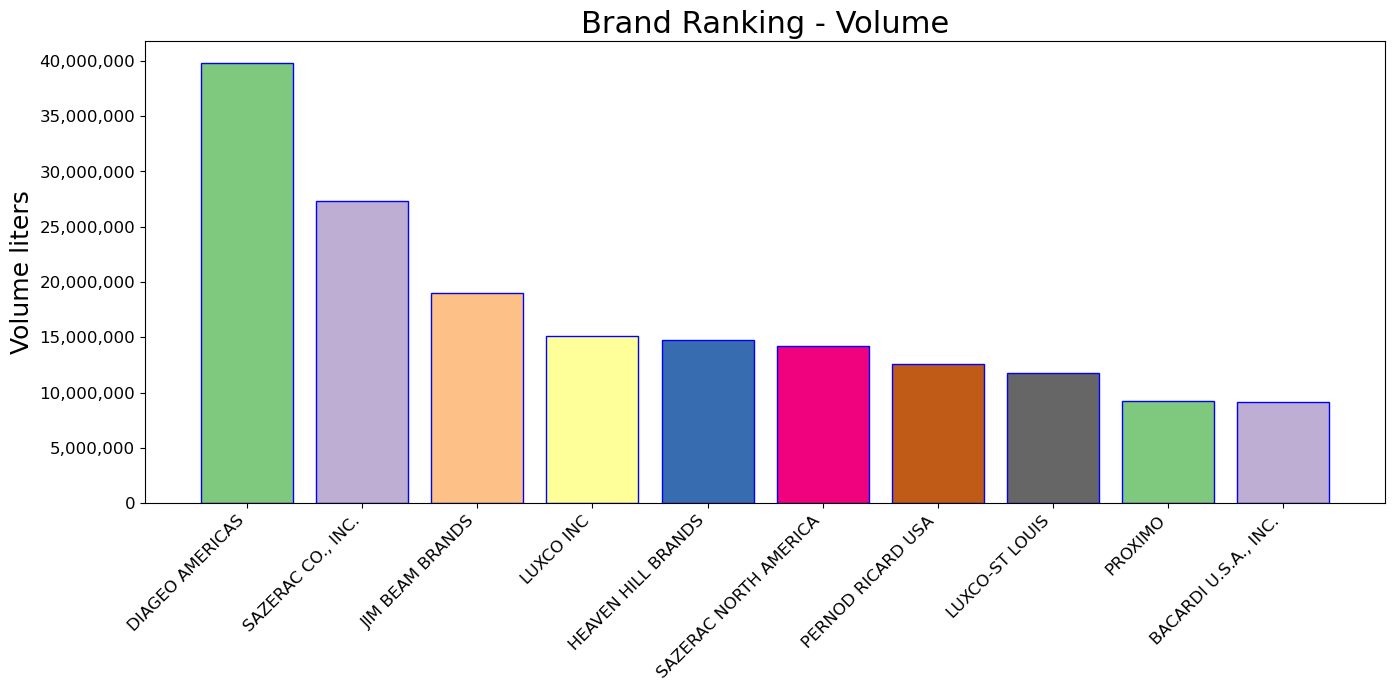

In [29]:

df_rank = df_rank.head(10)
fig, ax = plt.subplots(figsize=(16, 6))
#sns.set(style = 'white')
name = "Accent"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

plt.title('Brand Ranking - Volume', size=22)
ax.bar(df_rank['Vendor Name simple'], df_rank['Volume Sold (Liters)'], color=colors, edgecolor='blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Volume liters', size=18)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

In [30]:
df_rank.columns

Index(['Vendor Name simple', 'Volume Sold (Liters)', 'Sale (Dollars)'], dtype='object')

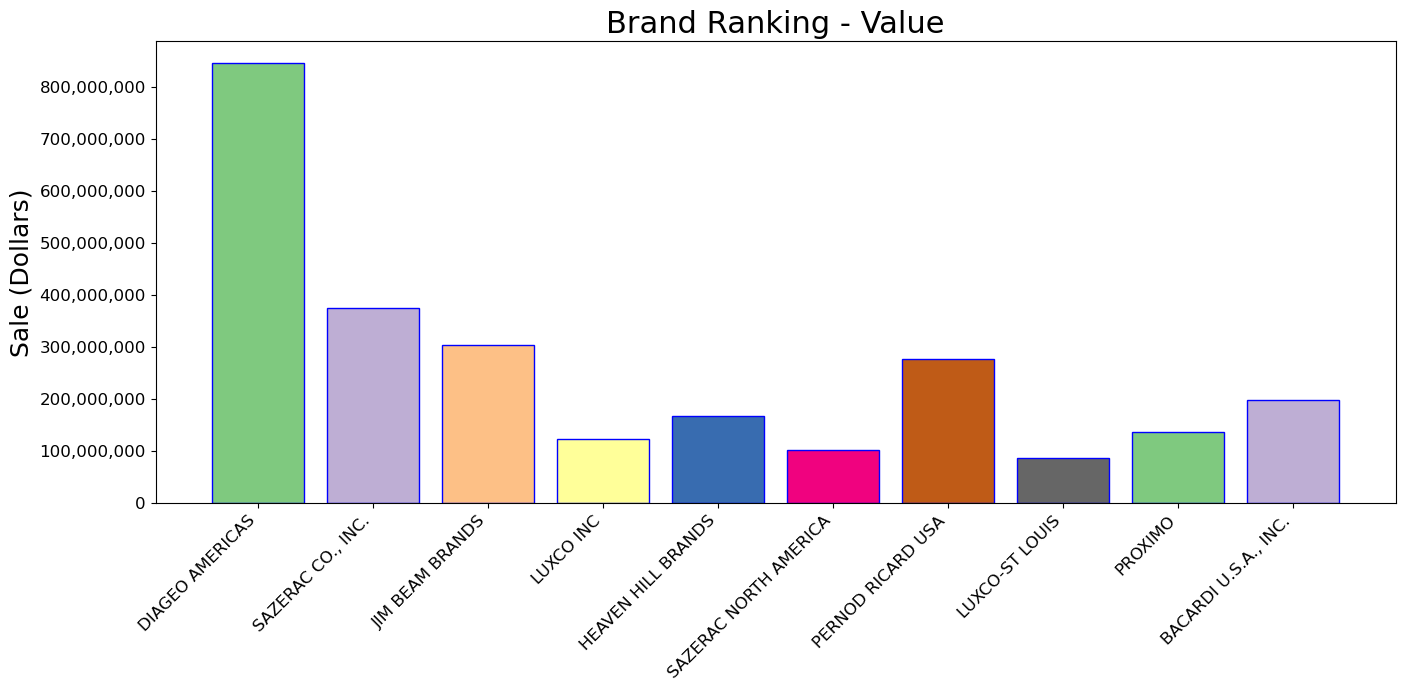

In [31]:

df_rank = df_rank.head(10)
fig, ax = plt.subplots(figsize=(16, 6))
#sns.set(style = 'white')
name = "Accent"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

plt.title('Brand Ranking - Value', size=22)
ax.bar(df_rank['Vendor Name simple'], df_rank['Sale (Dollars)'], color=colors, edgecolor='blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Sale (Dollars)', size=18)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

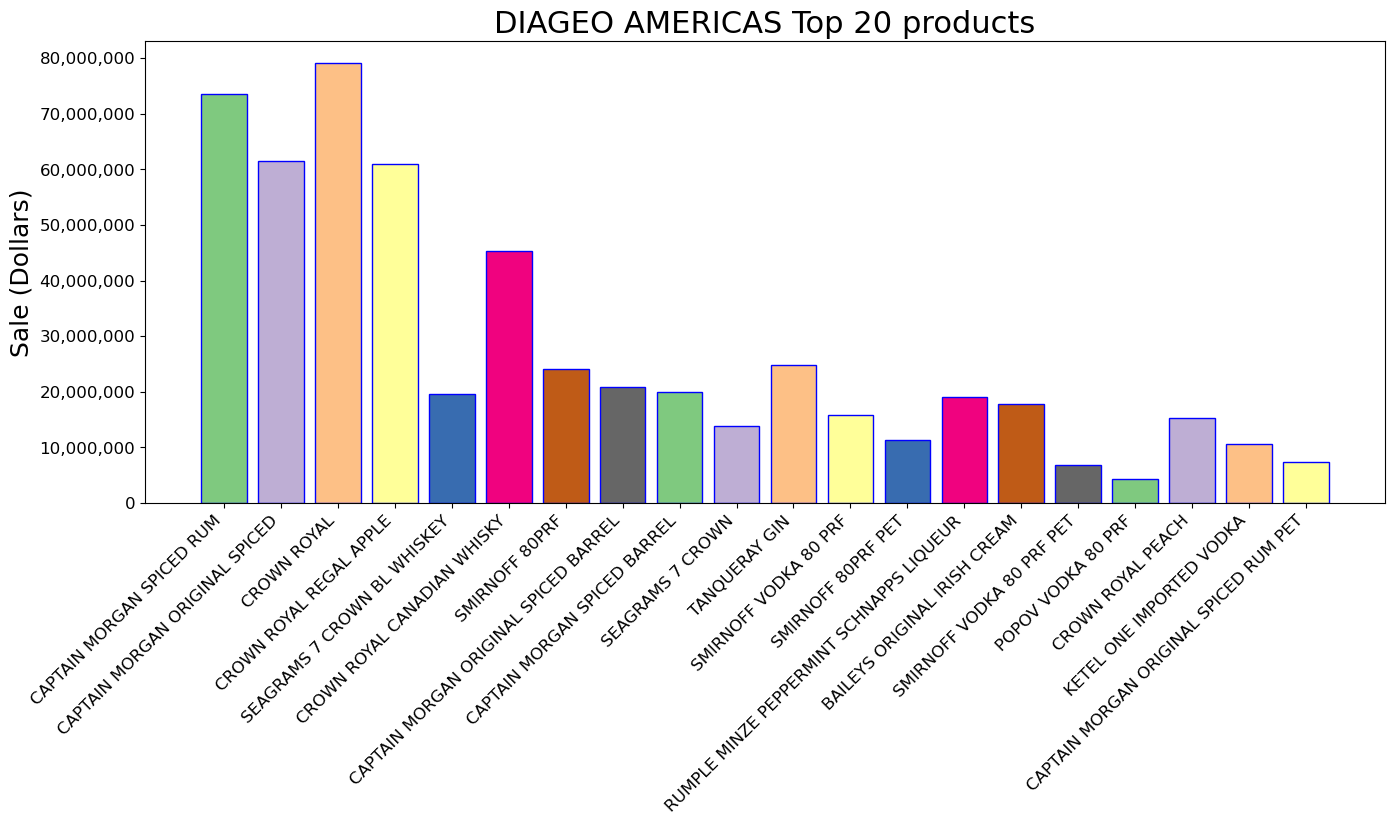

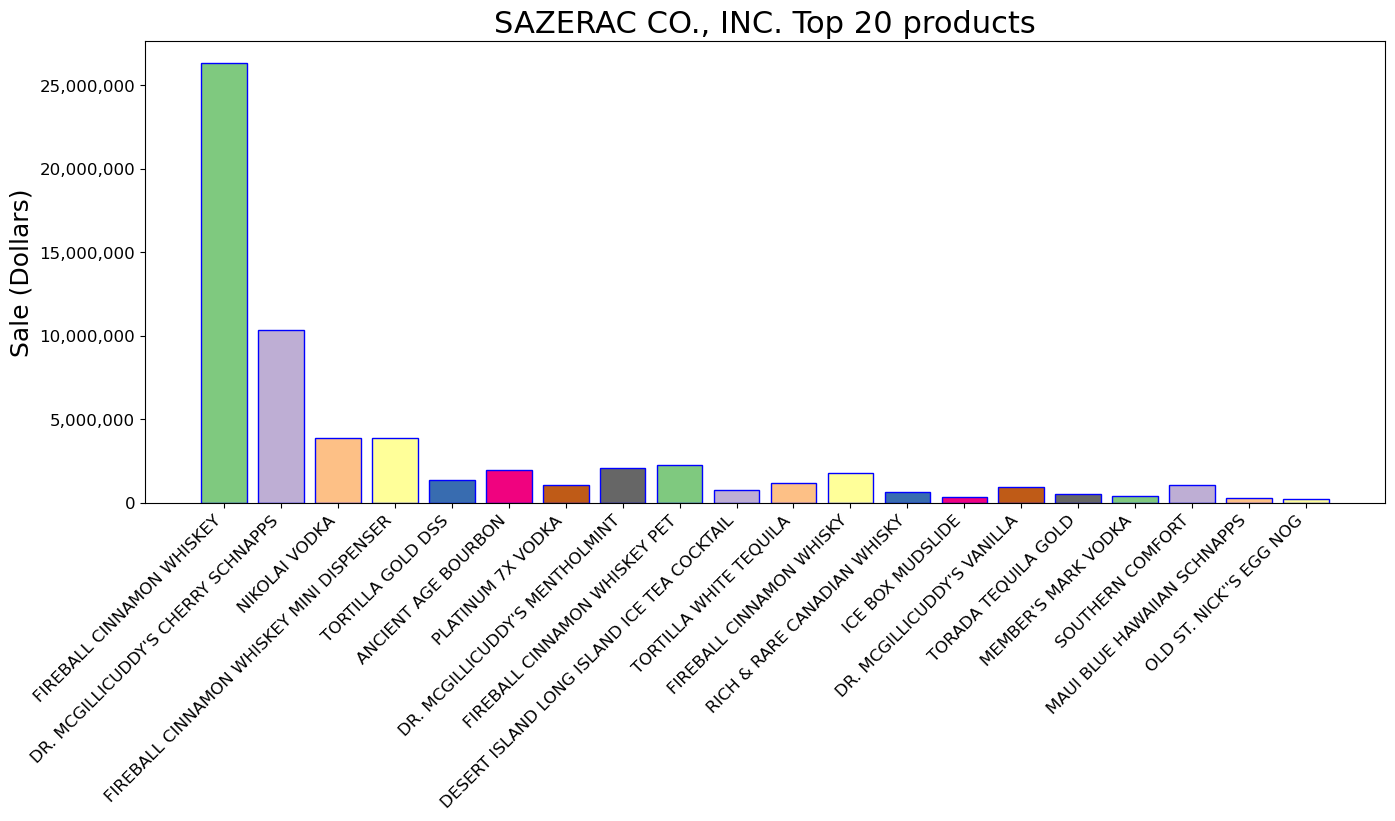

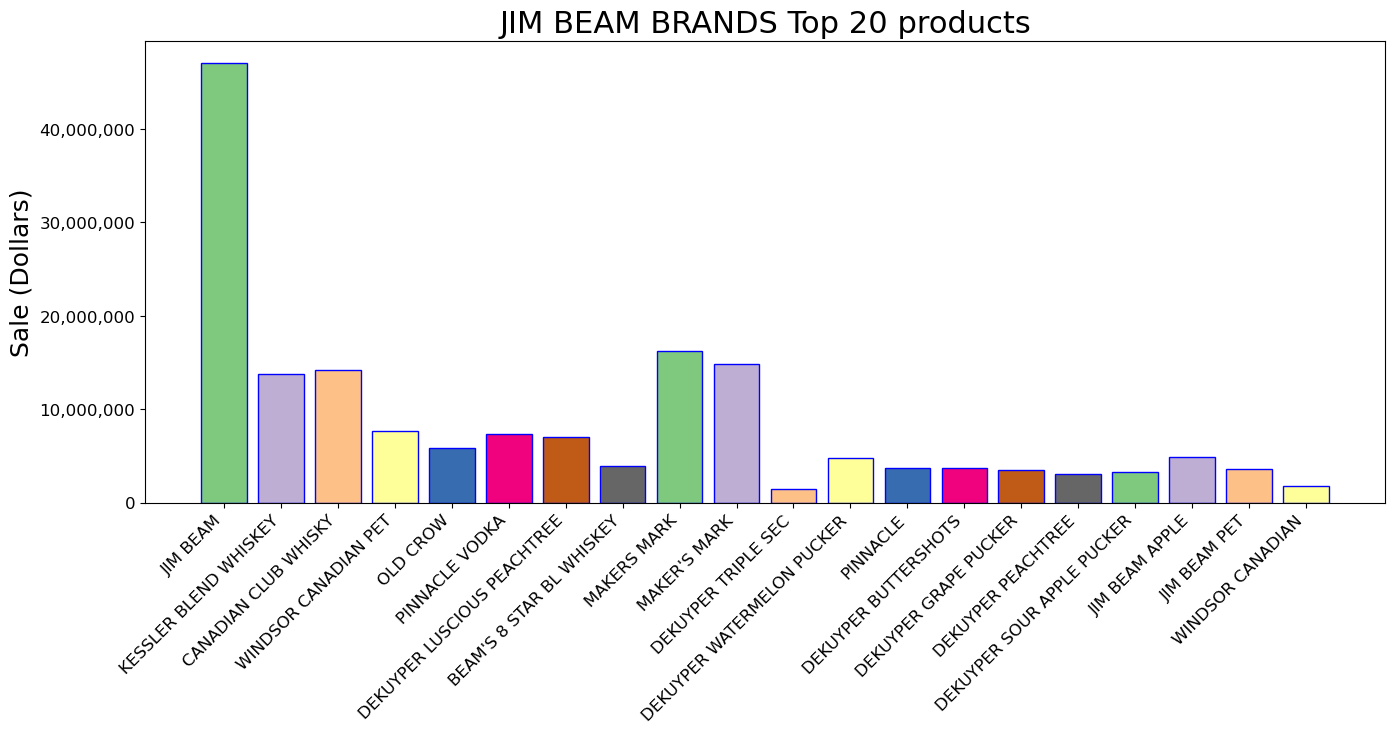

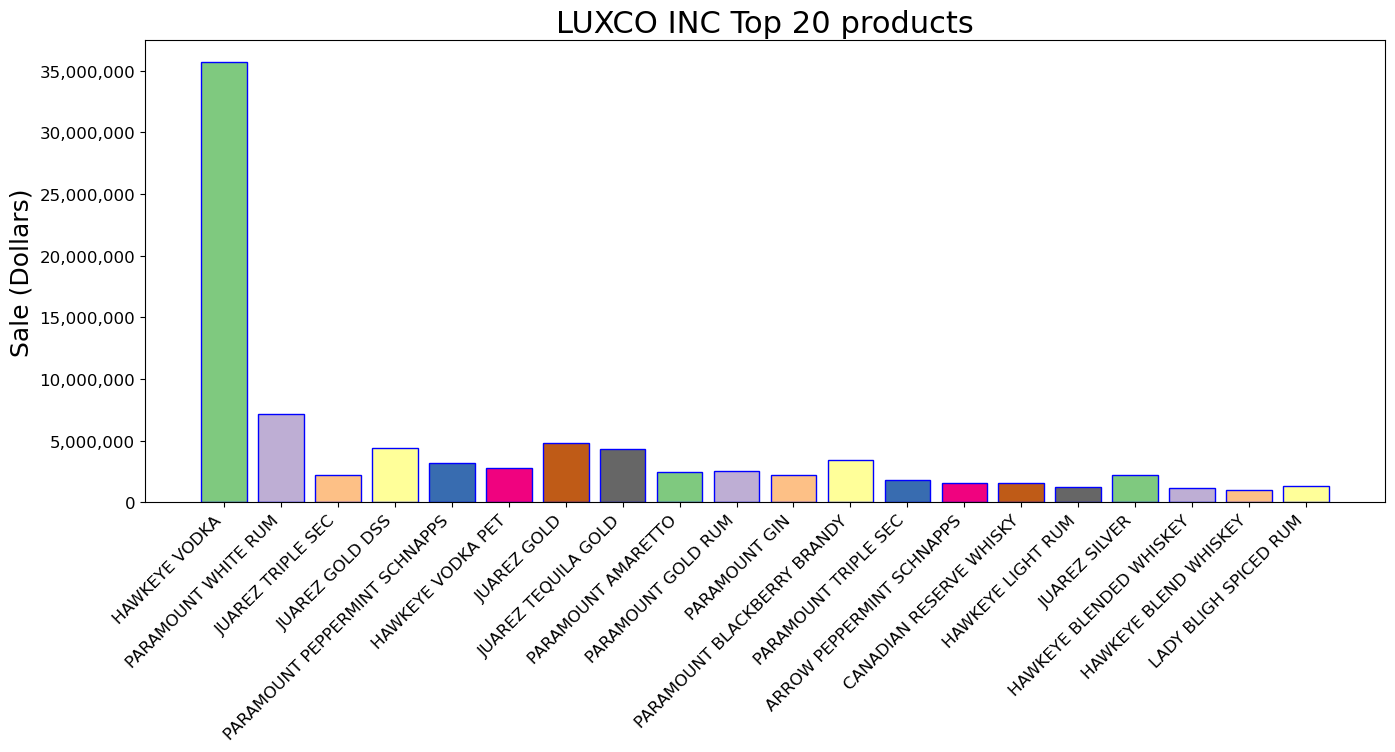

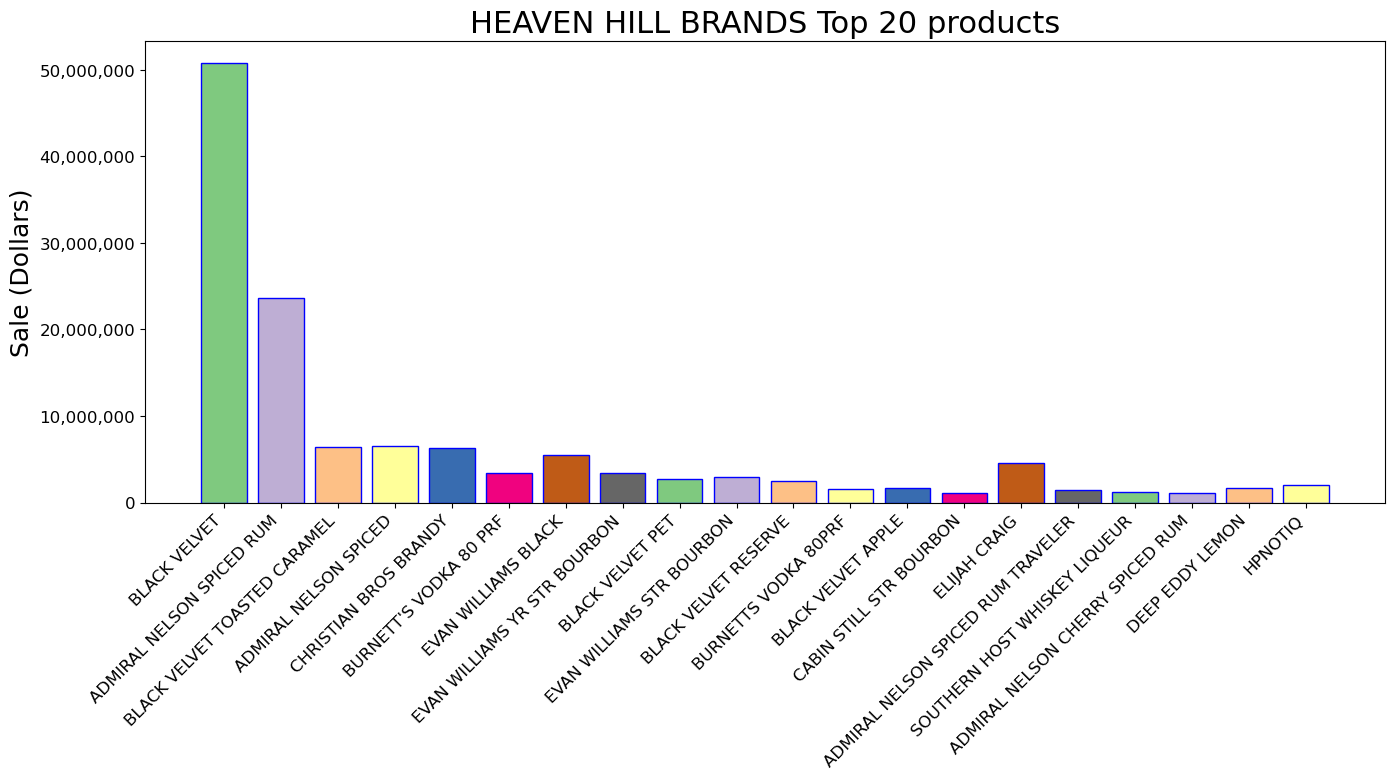

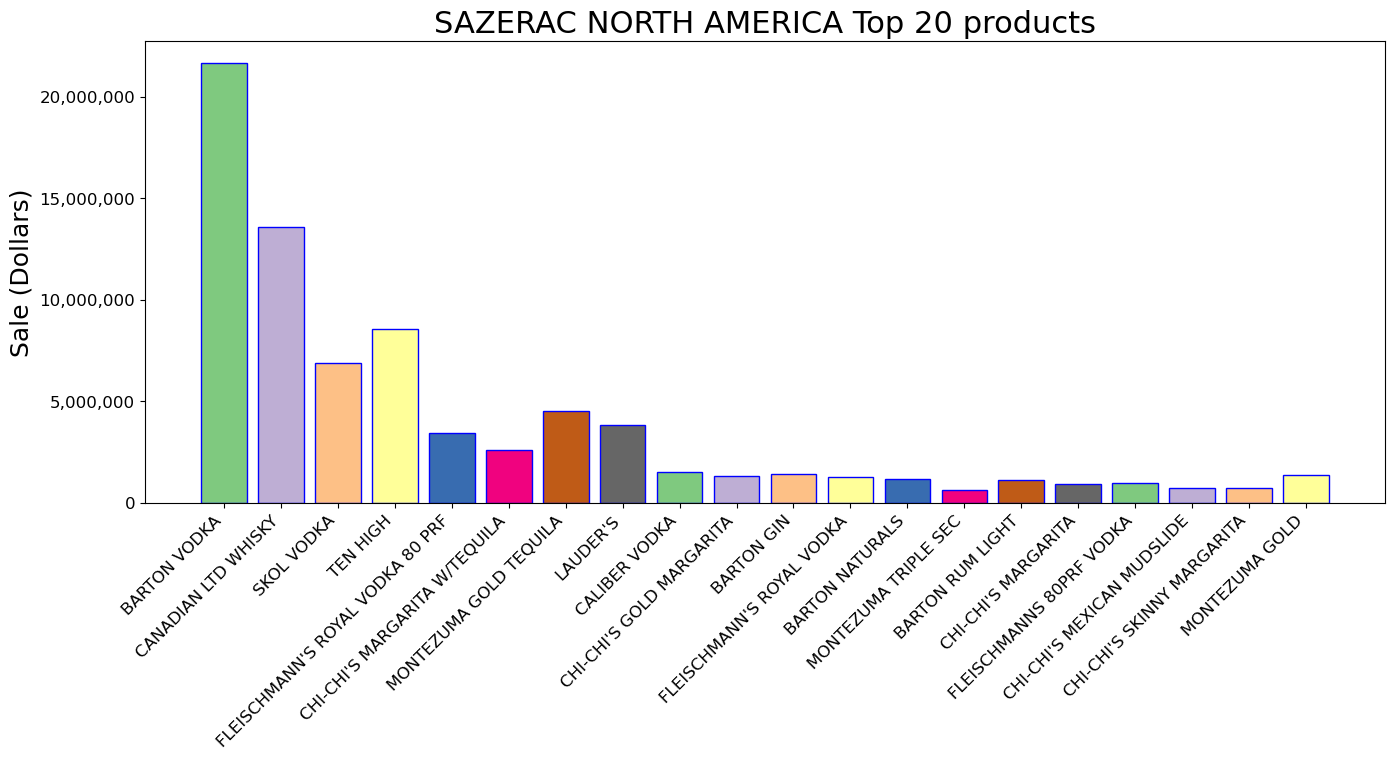

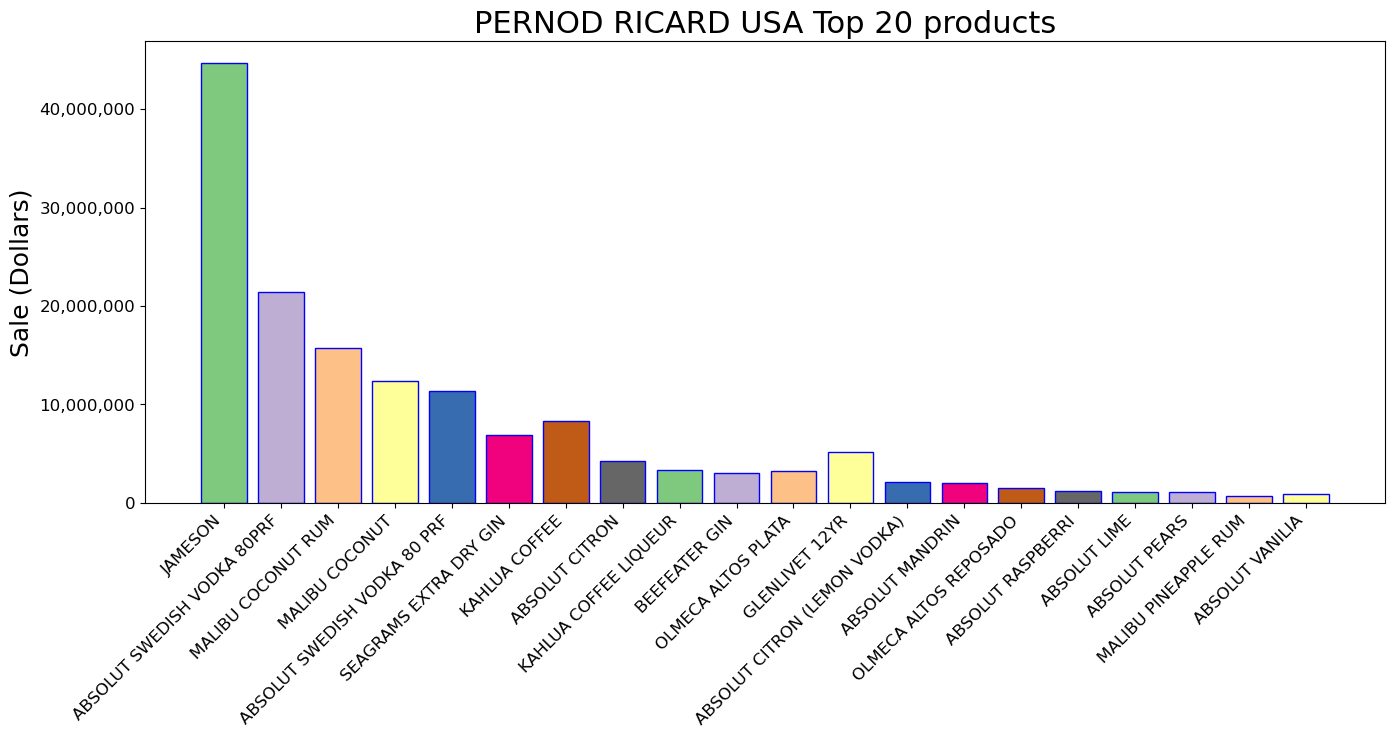

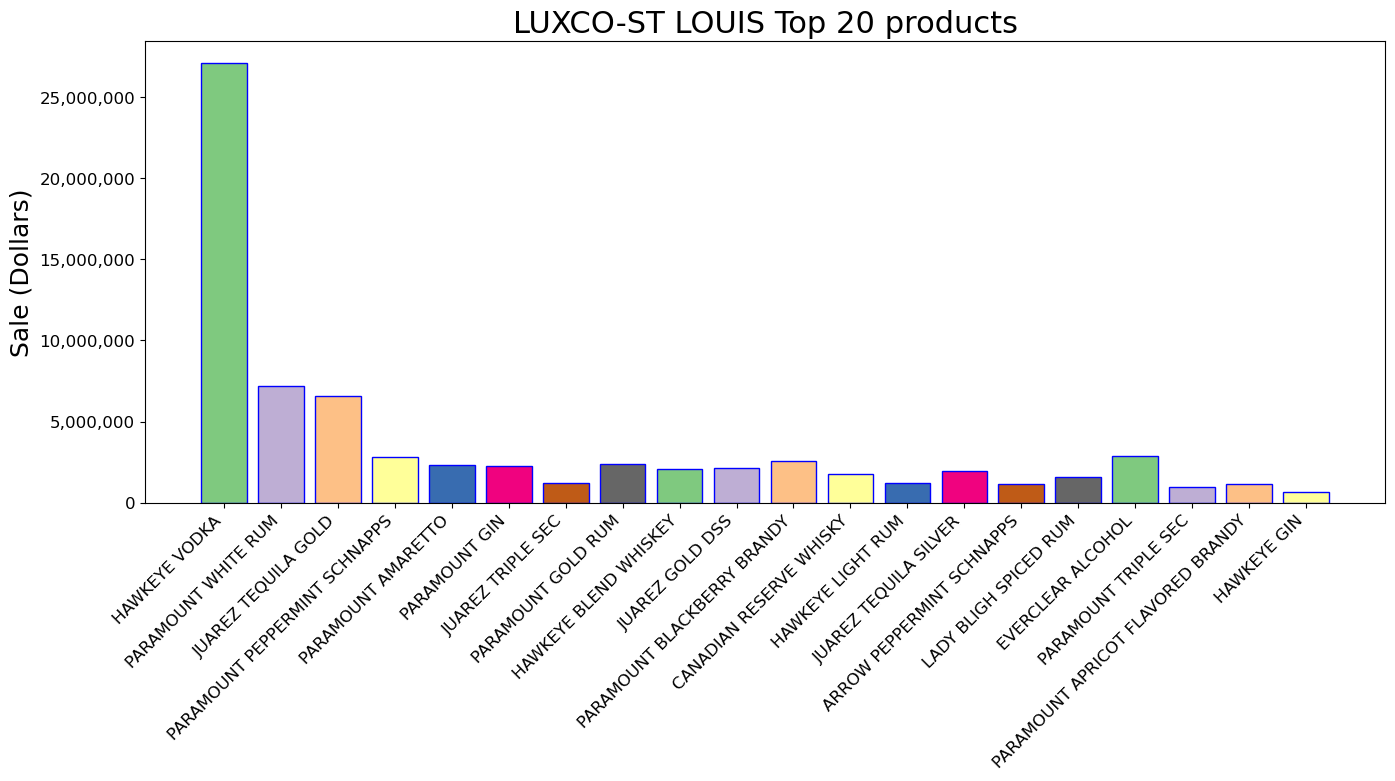

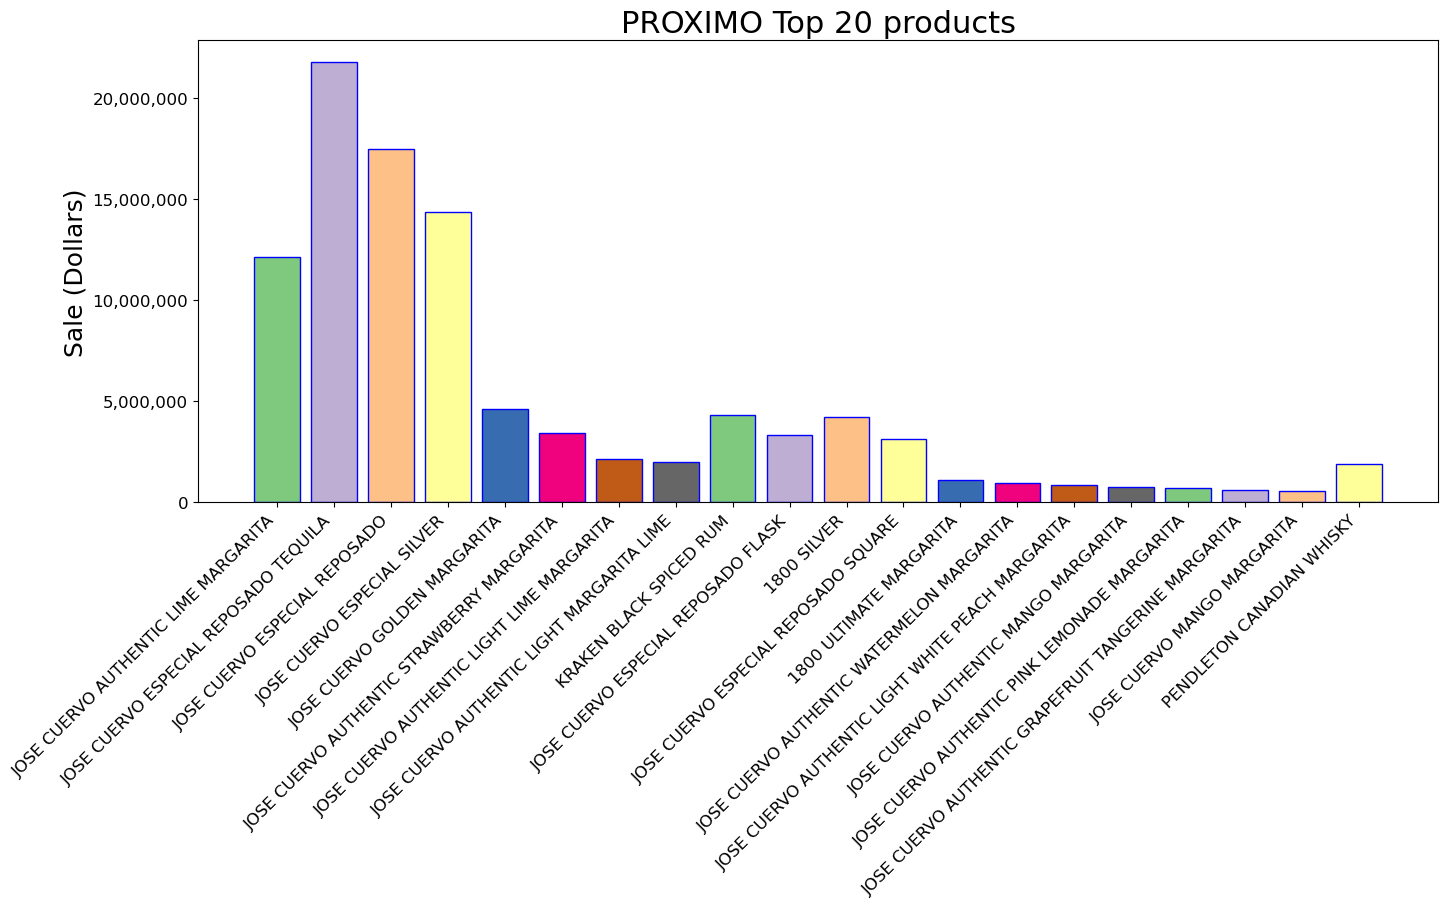

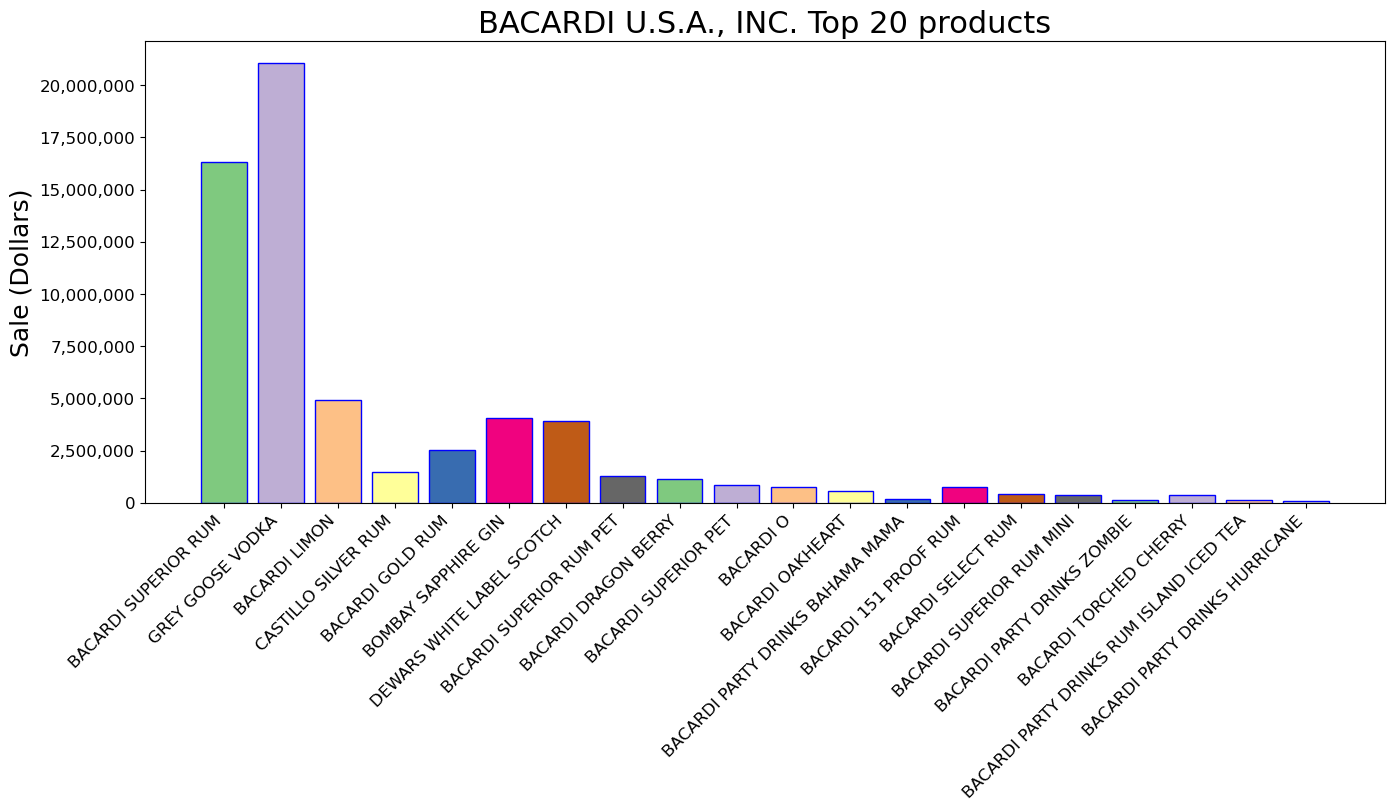

In [32]:
# Item analysis per vendor
main_brands = brands[0:10]

for br in main_brands :
   df_1 = df[df['Vendor Name'] == br]
   df_1 = df_1.groupby(['Item Description'])[['Volume Sold (Liters)','Sale (Dollars)']].sum().reset_index()
   df_1.sort_values(["Volume Sold (Liters)"], ascending=[False], inplace=True)

   df_rank = df_1
   df_rank = df_rank.head(20)
   fig, ax = plt.subplots(figsize=(16, 6))
   #sns.set(style = 'white')
   name = "Accent"
   cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
   colors = cmap.colors  # type: list

   plt.title(br +' Top 20 products', size=22)
   ax.bar(df_rank['Item Description'], df_rank['Sale (Dollars)'], color=colors, edgecolor='blue')
   ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
   plt.ylabel('Sale (Dollars)', size=18)
   plt.xticks(fontsize=12, rotation=45, ha='right')
   plt.yticks(fontsize=12)
   plt.show()

In [33]:
df = df_back.copy()
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'dummy', 'Lat', 'Lon', 'invoice_number', 'item_number'],
      dtype='object')

In [34]:

cols_to_drop = ['Date', 'Invoice/Item Number', 'Address', 'City', 'Zip Code',
       'County', 'Category',
       'Category Name', 'Vendor Number', 'Vendor Name', 'Item Number',
       'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'dummy', 'Lat', 'Lon',
       'invoice_number', 'item_number']

In [35]:
# we obtain list of stores and location

df = df.drop(cols_to_drop, axis=1)
stores_df = df.pivot_table(index=['Store Name', "Store Location", "County Number"])
cols = stores_df.columns
stores_df = stores_df.reset_index()
stores_df = stores_df.drop(cols, axis=1)

In [36]:
# Clean point format
stores_df[['dummy','Lat', 'Lon']]= stores_df['Store Location'].str.split(" ", n=-1, expand=True)
stores_df['Lat'] = stores_df['Lat'].str.replace('(', '')
stores_df['Lon'] = stores_df['Lon'].str.replace(')', '')
stores_df = stores_df.drop('dummy', axis=1)

In [37]:
stores_df

Store Name  \
0           "DOUBLE ""D"" LIQUOR STORE"   
1            'DA BOOZE BARN / WEST BEND   
2            'DA BOOZE BARN / WEST BEND   
3            'DA BOOZE BARN / WEST BEND   
4     10TH HOLE INN & SUITE / GIFT SHOP   
...                                 ...   
3864       YOUR PRIVATE BAR / URBANDALE   
3865       YOUR PRIVATE BAR / URBANDALE   
3866                     YR DOLLAR STOP   
3867                     Z'S QUICKBREAK   
3868               ZAPF'S PRONTO MARKET   

                             Store Location  County Number         Lat  \
0              POINT (-91.473634 43.262114)            3.0  -91.473634   
1              POINT (-73.982421 40.305231)           74.0  -73.982421   
2     POINT (-73.982421 40.305231000000006)           74.0  -73.982421   
3              POINT (-94.445143 42.959247)           74.0  -94.445143   
4               POINT (-92.547769 43.36388)           45.0  -92.547769   
...                                     ...            ...         ...   
3864           POINT (-93.760606 41.622471)           77.0  -93.760606   
3865           POINT (-93.760607 41.622517)           77.0  -93.760607   
3866           POINT (-91.652082 41.988229)           57.0  -91.652082   
3867           POINT (-91.551598 40.965272)           44.0  -91.551598   
3868            POINT (-91.405293 42.85389)           22.0  -91.405293   

                     Lon  
0              43.262114  
1              40.305231  
2     40.305231000000006  
3              42.959247  
4               43.36388  
...                  ...  
3864           41.622471  
3865           41.622517  
3866           41.988229  
3867           40.965272  
3868            42.85389  

[3869 rows x 5 columns]

In [38]:
# A simple folium visualization
# center of IOWA 93.0977 41.8780
i_size = (1,1)
#icon = folium.features.CustomIcon(icon_url,icon_size=isize)
# icons are in fontwawesome.com v4.7
from folium.plugins import BeautifyIcon

map1 = folium.Map(
    location=[41.8780,-93.0977],
    tiles='OpenStreetMap',
    zoom_start=7,
    color='red'
)

# circle marker
circle_green = BeautifyIcon(
    icon_shape='circle-dot', 
    border_color='blue', 
    border_width=3
)
#folium.Marker([-20, 25], tooltip='circle', icon=icon_circle).add_to(m)

stores_df.apply(lambda row:folium.Marker(location=[row["Lon"], row["Lat"]], popup=row['Store Name'],     
              icon=BeautifyIcon(icon_shape='circle-dot', border_color='red',
              fill_opacity=0.4)).add_to(map1), axis=1)
#             icon=folium.Icon(icon='shopping-cart', color='red', prefix='fa'), icon_size=i_size).add_to(map1), axis=1)
map1
#map1.save('test.html')
# what should we do with the 3 outliers?

In [39]:
# Let's do a map of counties 'counting' the shops in that county
# see https://georgetsilva.github.io/posts/mapping-points-with-folium/
# Loading counties geogrpahical information


In [40]:
geo_county=geopandas.read_file('cb_2018_us_county_20m.shp')
# IOWA is state n=19
geo_counties_IOWA = geo_county[geo_county['STATEFP']=='19']

In [41]:
# generate dataframe counting shops per county
# first we delete duplicates of shop names in dataframe
df_2015 = df_2015.drop_duplicates(subset=['Store Name'], keep='first', inplace=False)
# Now we count the number of stores per county << madre del cordero >>
df_2015.groupby('County')['Store Name'].count()

County
ADAIR          8
ADAMS          1
ALLAMAKEE      6
APPANOOSE      6
AUDUBON        3
              ..
WINNEBAGO      7
WINNESHIEK     5
WOODBURY      37
WORTH          3
WRIGHT         9
Name: Store Name, Length: 99, dtype: int64

In [42]:
geo_counties_IOWA

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
12        19      083  00465230  0500000US19083  19083      Hardin   06   
47        19      141  00465259  0500000US19141  19141     O'Brien   06   
60        19      081  00465229  0500000US19081  19081     Hancock   06   
79        19      019  00465199  0500000US19019  19019    Buchanan   06   
142       19      023  00465201  0500000US19023  19023      Butler   06   
...      ...      ...       ...             ...    ...         ...  ...   
3014      19      151  00465264  0500000US19151  19151  Pocahontas   06   
3029      19      161  00465269  0500000US19161  19161         Sac   06   
3042      19      087  00465232  0500000US19087  19087       Henry   06   
3090      19      131  00465254  0500000US19131  19131    Mitchell   06   
3166      19      101  00465239  0500000US19101  19101   Jefferson   06   

           ALAND   AWATER                                           geometry  
12    1474505075  1776735  POLYGON ((-93.49948 42.55770, -93.02700 42.556...  
47    1484154162   447448  POLYGON ((-95.86191 43.25757, -95.38808 43.255...  
60    1478895049  5265568  POLYGON ((-93.97042 43.25536, -93.49764 43.255...  
79    1479085972  5223780  POLYGON ((-92.08166 42.64206, -91.60706 42.643...  
142   1502553961  4191852  POLYGON ((-93.02514 42.90755, -92.55421 42.907...  
...          ...      ...                                                ...  
3014  1495047140  3666530  POLYGON ((-94.91389 42.90970, -94.44295 42.908...  
3029  1489300198  8569439  POLYGON ((-95.38801 42.56174, -94.91448 42.560...  
3042  1124799690  5773350  POLYGON ((-91.71818 40.90109, -91.71604 41.162...  
3090  1215049039  1118415  POLYGON ((-93.02435 43.49956, -92.87028 43.499...  
3166  1127999804  3524817  POLYGON ((-92.17997 41.16266, -91.94557 41.163...  

[99 rows x 10 columns]

In [43]:
counties = df_2015.groupby('County')['Store Name'].count().to_frame().reset_index()
counties

County  Store Name
0        ADAIR           8
1        ADAMS           1
2    ALLAMAKEE           6
3    APPANOOSE           6
4      AUDUBON           3
..         ...         ...
94   WINNEBAGO           7
95  WINNESHIEK           5
96    WOODBURY          37
97       WORTH           3
98      WRIGHT           9

[99 rows x 2 columns]

In [44]:
geo_counties_IOWA = geo_counties_IOWA.rename(columns={"NAME": "County"})
geo_counties_IOWA['County'] = geo_counties_IOWA['County'].str.upper()
counties = counties.merge(geo_counties_IOWA, on='County')
counties = counties.rename(columns={"Store Name": "N stores"})
counties.head(3)

County  N stores STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID LSAD  \
0      ADAIR         8      19      001  00465190  0500000US19001  19001   06   
1      ADAMS         1      19      003  00465191  0500000US19003  19003   06   
2  ALLAMAKEE         6      19      005  00465192  0500000US19005  19005   06   

        ALAND    AWATER                                           geometry  
0  1474404193   2597996  POLYGON ((-94.70063 41.50415, -94.24159 41.503...  
1  1096686268   5367875  POLYGON ((-94.92759 41.15851, -94.70059 41.158...  
2  1655115645  51094070  POLYGON ((-91.61084 43.50069, -91.49104 43.500...

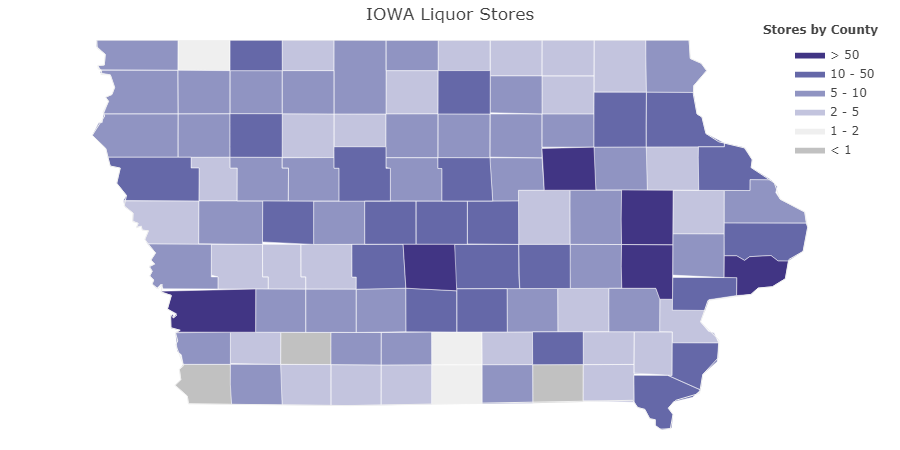

In [45]:
# Let's draw the figure

counties['total_fip'] = counties['STATEFP']+counties['COUNTYFP']
values = counties['N stores'].tolist()
fips   = counties['total_fip'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Iowa'],
    binning_endpoints=[1, 2, 5, 10, 50], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Stores by County', title='IOWA Liquor Stores'
)
fig.layout.template = None
fig.show('png')

In [46]:
# Figure of county population
file = 'County_Population_in_Iowa_by_Year.csv'
counties_population = pd.read_csv(file, header=0)

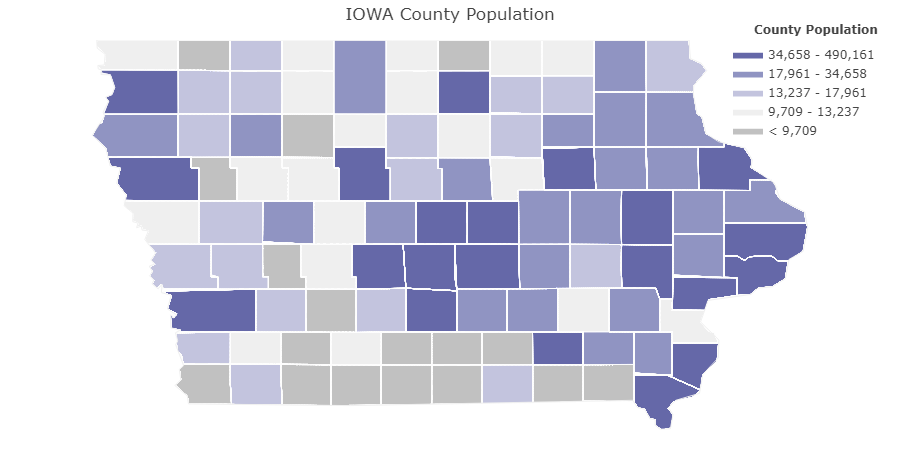

In [47]:
counties_population['Year'] = pd.to_datetime(counties_population['Year'])
cunties_population = counties_population[counties_population['Year'].dt.year == 2015]
values = counties_population['Population'].tolist()
fips   = counties_population['FIPS'].tolist()

#Calculating Binning endpoints

quartiles= counties_population['Population'].quantile([0.20,0.4,0.6,0.8,1]).values.tolist()


fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Iowa'],
    binning_endpoints=quartiles, colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='County Population', title='IOWA County Population'
)
fig.layout.template = None
fig.show('png')

In [48]:
# Figure City Population IOWA
file = 'Total_City_Population_by_Year.csv'
cities_population = pd.read_csv(file, header=0)
cities_population['Year'] = pd.to_datetime(cities_population['Year'])
cities_population = cities_population[cities_population['Year'].dt.year == 2015]

In [49]:
# add lat lon cleaning POINT format
cities_population[['dummy','Lon', 'Lat']]= cities_population['Primary Point'].str.split(" ", n=-1, expand=True)
cities_population['Lon'] = cities_population['Lon'].str.replace('(', '')
cities_population['Lat'] = cities_population['Lat'].str.replace(')', '')
cities_population = cities_population.drop('dummy', axis=1)
cities_population = cities_population.sort_values(by='Population', ascending=True)

In [50]:
cities_population['text'] = cities_population['City'] + '<br>Population ' + \
                      (cities_population['Population']).astype(int).astype(str)
limits = [(0,200),(201,400),(501,600),(601,800),(801,943)]
colors = ["crimson","lightseagreen","orange","lightgrey","royalblue"]
cities = []
scale = 50

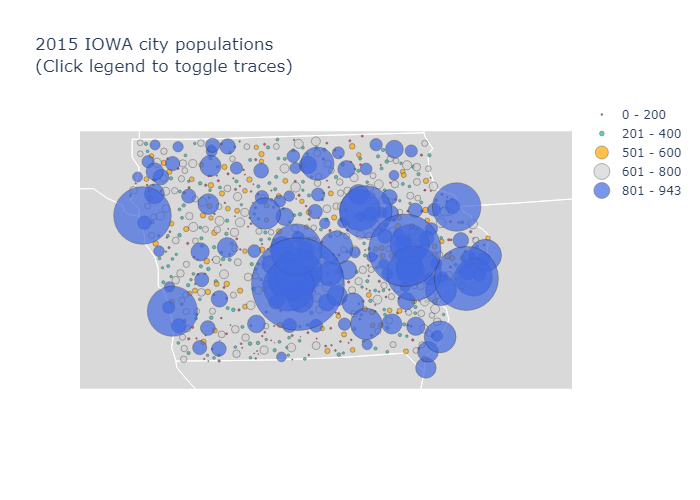

In [51]:
fig = go.Figure()


for i in range(len(limits)):
    lim = limits[i]
    df_sub = cities_population[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Lon'],
        lat = df_sub['Lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Population']/scale,
            
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2015 IOWA city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
# focus point
lat_foc = 41.8780
lon_foc = -93.0977
fig.update_layout(
        geo = dict(
            projection_scale=8, #this is kind of like zoom
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
        ))
fig.show('png')# trick to freeze it in Notebook 

In [52]:
import session_info
session_info.show(html=False)

-----
folium              0.14.0
geopandas           0.14.2
matplotlib          3.8.0
pandas              2.1.4
plotly              5.19.0
session_info        1.0.0
thefuzz             0.19.0
-----
IPython             8.20.0
jupyter_client      8.6.0
jupyter_core        5.5.0
jupyterlab          4.0.11
notebook            7.0.8
-----
Python 3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
-----
Session information updated at 2024-03-20 23:36
